## Perceptron 

In [1]:
# perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # setosa brother

In [3]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

Perceptron(random_state=42)

In [4]:
X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new) # T F for these 2 flowers
y_pred

array([ True, False])

## Regression MLP

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
housing = fetch_california_housing() # è un array np

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [8]:
# this MLP hasn't activation function
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [9]:
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
# deprecated mean_squared_error(squared = False)
rmse

0.5053326657968465

## Classification MLP

In [10]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

In [11]:
iris = load_iris()
# iris
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

In [12]:
mlp_cls = MLPClassifier(hidden_layer_sizes=[10], max_iter=10_000,random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_cls)

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=[10], max_iter=10000,
                               random_state=42))])

In [14]:
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# MLP Keras

In [15]:
import tensorflow as tf

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [18]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [19]:
# scale the pixel intensity
X_train, X_valid, X_test = X_train/255. , X_valid/255. , X_test/255.

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
import matplotlib.pyplot as plt

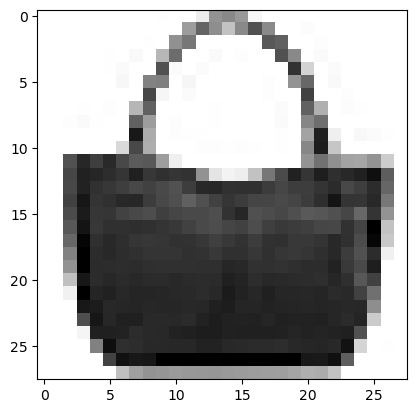

In [22]:
plt.imshow(X_train[100], cmap="binary")
plt.show()

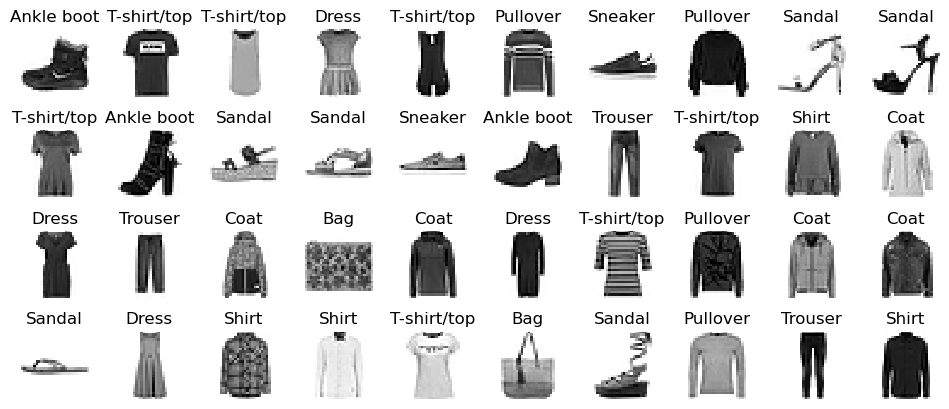

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Sequential API

In [24]:
# method 1
tf.random.set_seed(42)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(300, activation="relu")) # = tf.keras.activations.relu.
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [25]:
# method 2
tf.random.set_seed(42)

model = tf.keras.Sequential([
tf.keras.layers.Input(shape=[28,28]),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print(model.layers)
print(model.layers[1].name)
w, b = model.layers[1].get_weights()
print(w,"\n", w.shape, b.shape)

[<Flatten name=flatten_1, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]
dense_3
[[ 0.05483729 -0.01325337  0.04156375 ...  0.05302115  0.07074074
   0.03638572]
 [ 0.04090404  0.02704753 -0.05549704 ...  0.05093926 -0.017806
  -0.00718538]
 [-0.04245623  0.02762022  0.01755102 ...  0.01425707  0.05181247
   0.0040189 ]
 ...
 [ 0.00796714 -0.06553271 -0.07128879 ... -0.059053    0.00580115
   0.05520196]
 [-0.07094168 -0.01432458  0.01353549 ...  0.06482817  0.06982192
   0.02475636]
 [-0.00149427 -0.0503696  -0.03836643 ...  0.03214701  0.06869152
   0.01352731]] 
 (784, 300) (300,)


### Compiling

In [28]:
model.compile(loss="sparse_categorical_crossentropy", # = tf.keras.losses.sparse_categorical_crossentropy.
# model.compile(loss="categorical_crossentropy", # = tf.keras.losses.sparse_categorical_crossentropy.
              optimizer = "sgd", # = tf.keras.optimizers.SGD()/Adam()
              metrics = ["accuracy"])# = metrics = [tf.keras.metrics.sparse_categorical_accuracy]

### Fitting


In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6809 - loss: 1.0056 - val_accuracy: 0.8286 - val_loss: 0.5046
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8249 - loss: 0.5067 - val_accuracy: 0.8388 - val_loss: 0.4514
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8437 - loss: 0.4523 - val_accuracy: 0.8454 - val_loss: 0.4279
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8536 - loss: 0.4215 - val_accuracy: 0.8508 - val_loss: 0.4126
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3997 - val_accuracy: 0.8556 - val_loss: 0.4027
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8660 - loss: 0.3825 - val_accuracy: 0.8588 - val_loss: 0.3937
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3680 - val_accuracy: 0.8608 - val_loss: 0.3871
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8741 - loss: 0.3556 - 

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt

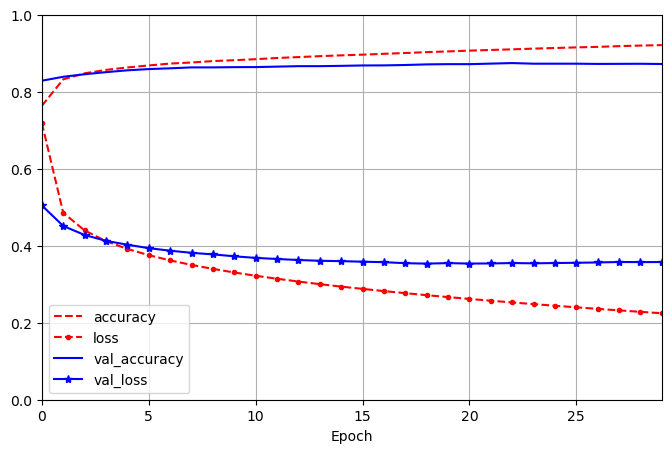

In [31]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8696 - loss: 0.3714


[0.36972877383232117, 0.8709999918937683]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.01, 0.  , 0.68],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
import numpy as np

In [37]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

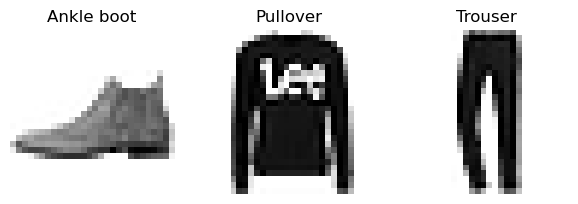

In [40]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Regression MLP Keras